In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.rl_eval import read_experiment_settings, plot_entire_duration_overlaying

from munch import Munch
import pickle as pickle

In [2]:
plt.show()

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
mpl.rcParams.update({'font.size': 10})

In [3]:
args = Munch()

args.adaptation_duration = 1440 * 240
args.algorithm = "PPO"
args.data_ID = "median"

In [4]:
experiment_settings = read_experiment_settings(args.algorithm)

suffix_setting_color_alpha = [
    ["20250629_165021_median_10.0_0.835_0.2", "vMicrobiome", "tab:green", 0.9],
    ["20250701_143231_median_10.0_1.0_1.0", "v0", "tab:gray", 0.6],
]

seeds = [0, 1, 2]

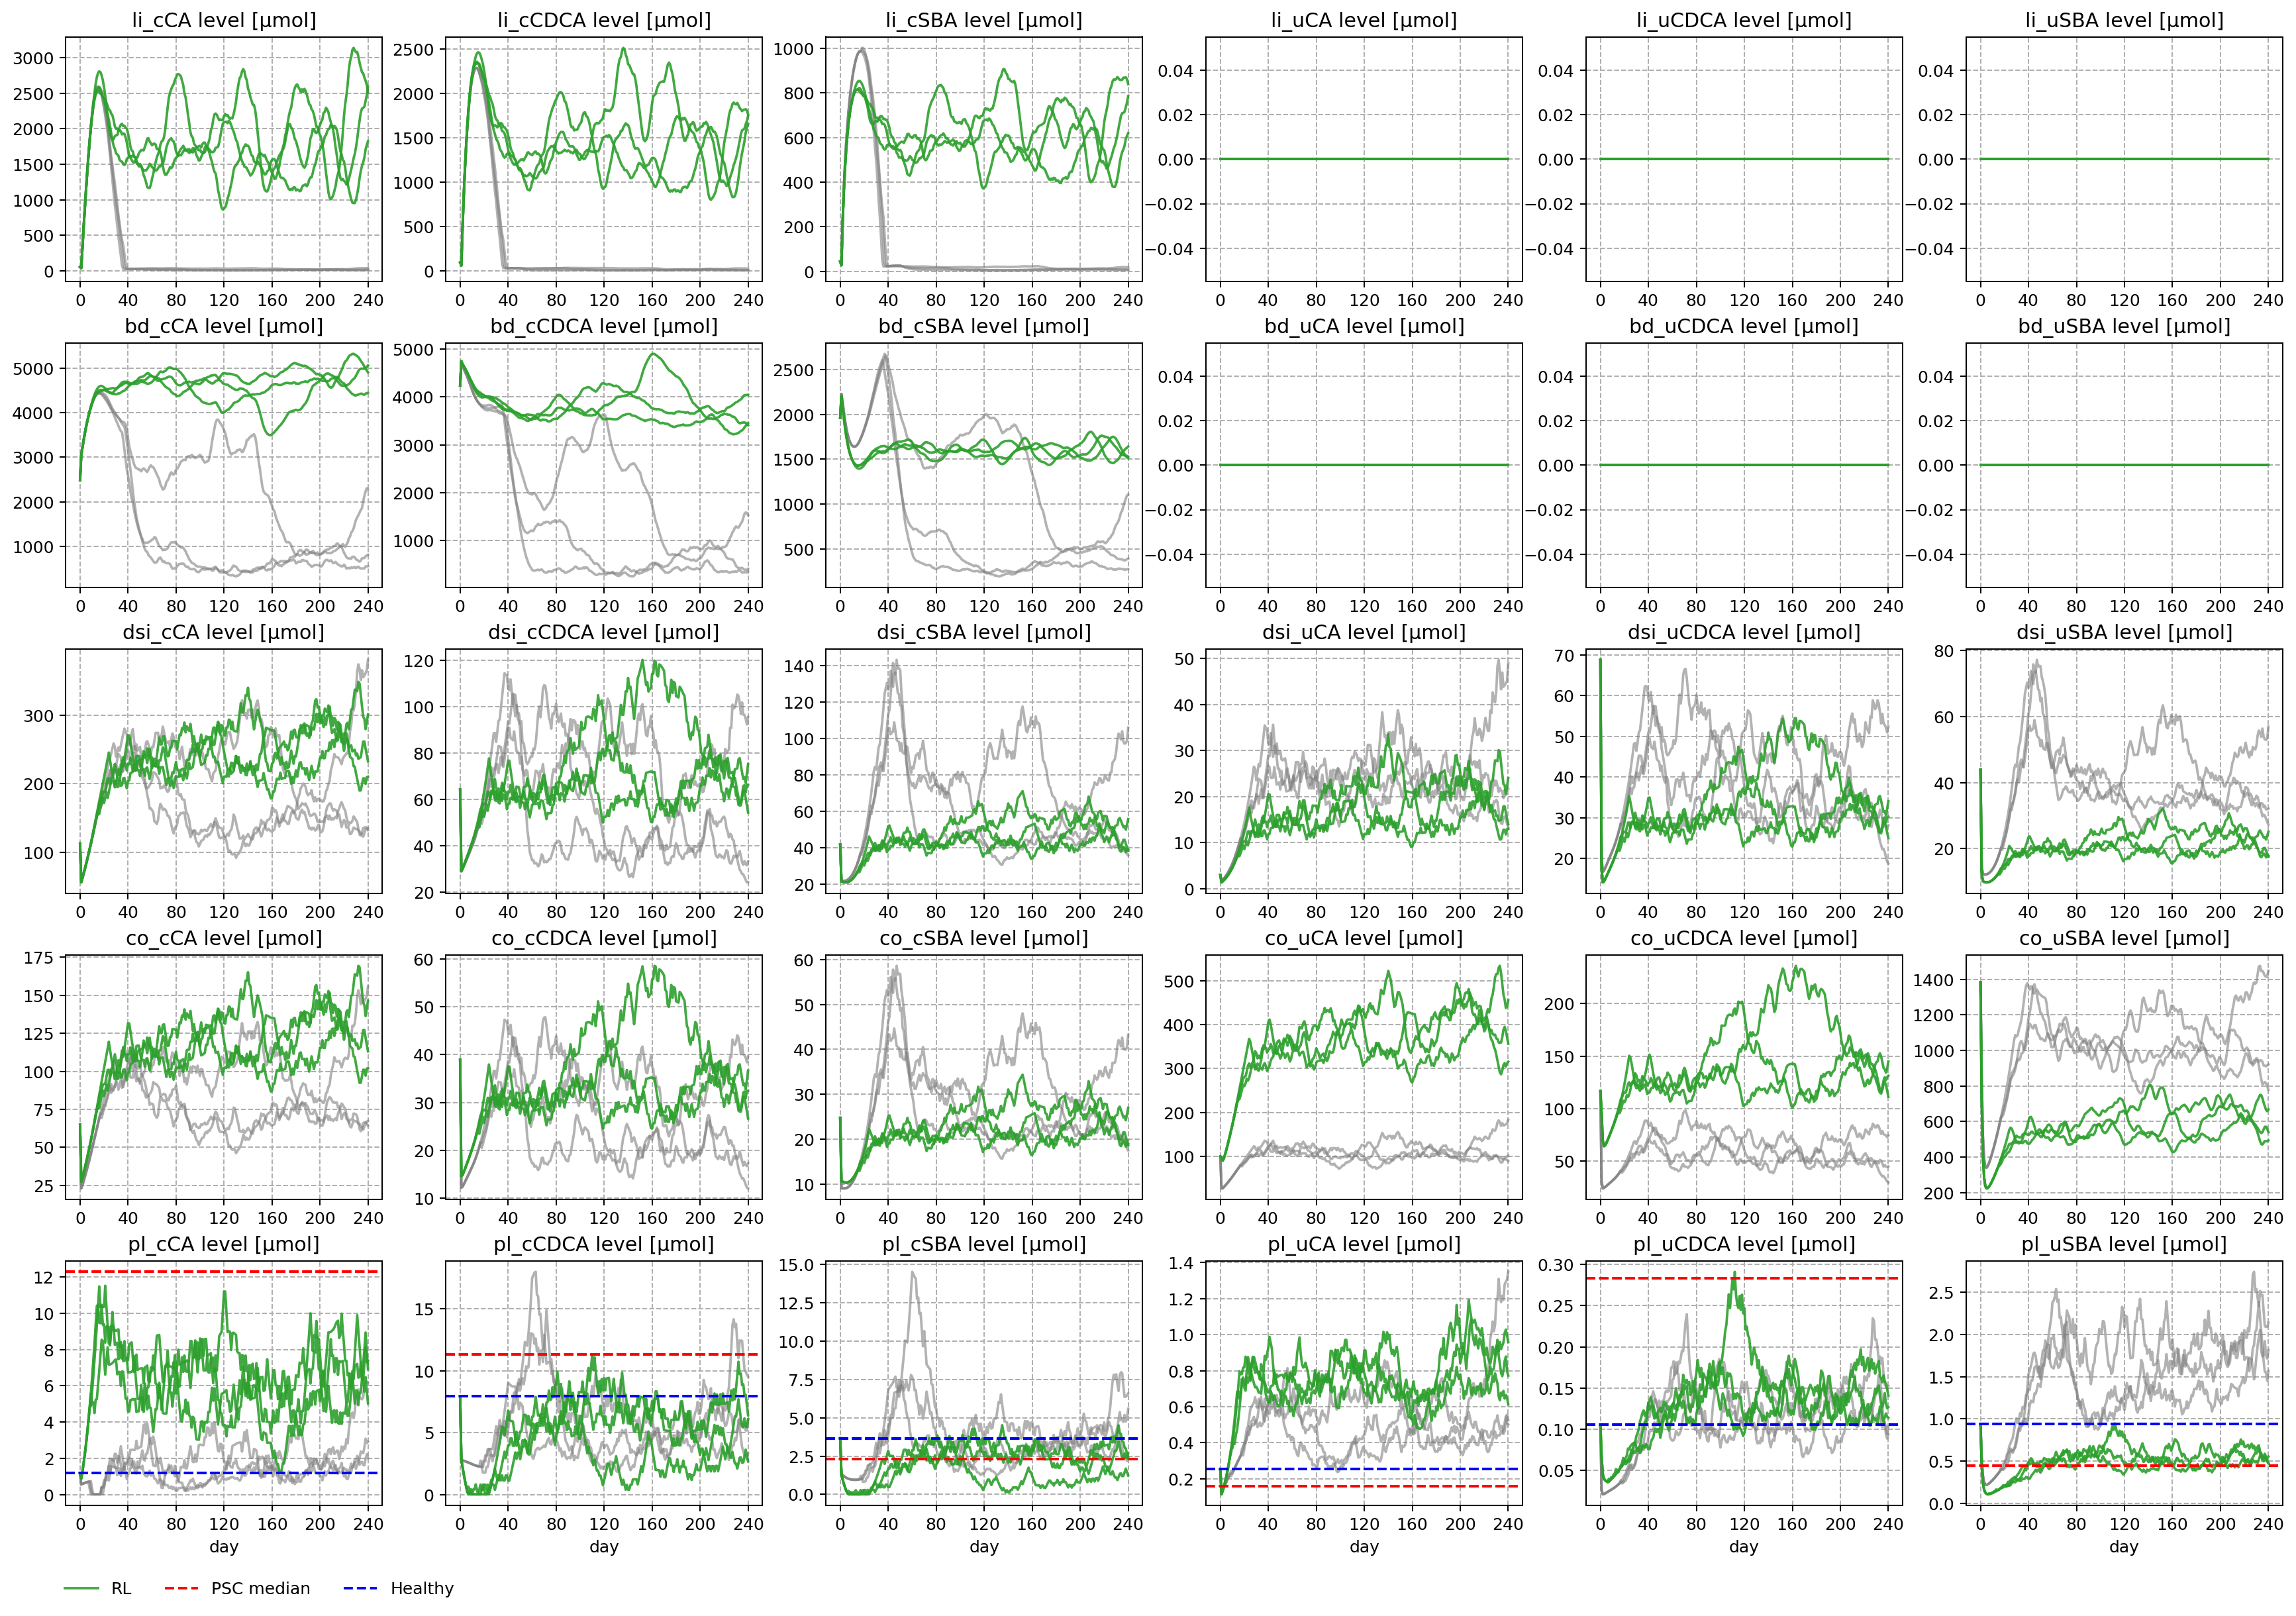

In [5]:
fig, axes = plt.subplots(5, 6, figsize=(24, 16))
axes = axes.flatten()

for suffix, setting, color, alpha in suffix_setting_color_alpha[::-1]:        
    for seed in seeds:
        model_path = f"experiments/{args.algorithm}/logs_{suffix}"
    
        with open(f"{model_path}/trajectory_{seed}.pickle", 'rb') as file:
            states, timepoints = pickle.load(file)
    
        plot_entire_duration_overlaying(axes, color, alpha, states, timepoints, 24, ground_truth=args.data_ID)

handles, labels = axes[24].get_legend_handles_labels()

from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))

axes[24].legend(by_label.values(), by_label.keys(),
                ncol=3,
                bbox_to_anchor=(-0.05, -0.25),
                loc='upper left',
                frameon=False)

plt.subplots_adjust(hspace=0.25)
plt.savefig("plot_entire_duration_overlaying.png")